In [1]:
# Import
import pyarrow
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import dates
import seaborn as sns

In [2]:
# Load and short information about the columns
df = pd.read_parquet('data/price.parquet', engine='pyarrow')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21346488 entries, 0 to 21346487
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   price             int64         
 1   date_of_transfer  datetime64[ns]
 2   property_type     object        
 3   is_new            bool          
 4   duration          object        
 5   city              object        
 6   district          object        
 7   county            object        
 8   ppdcategory_type  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 1.3+ GB


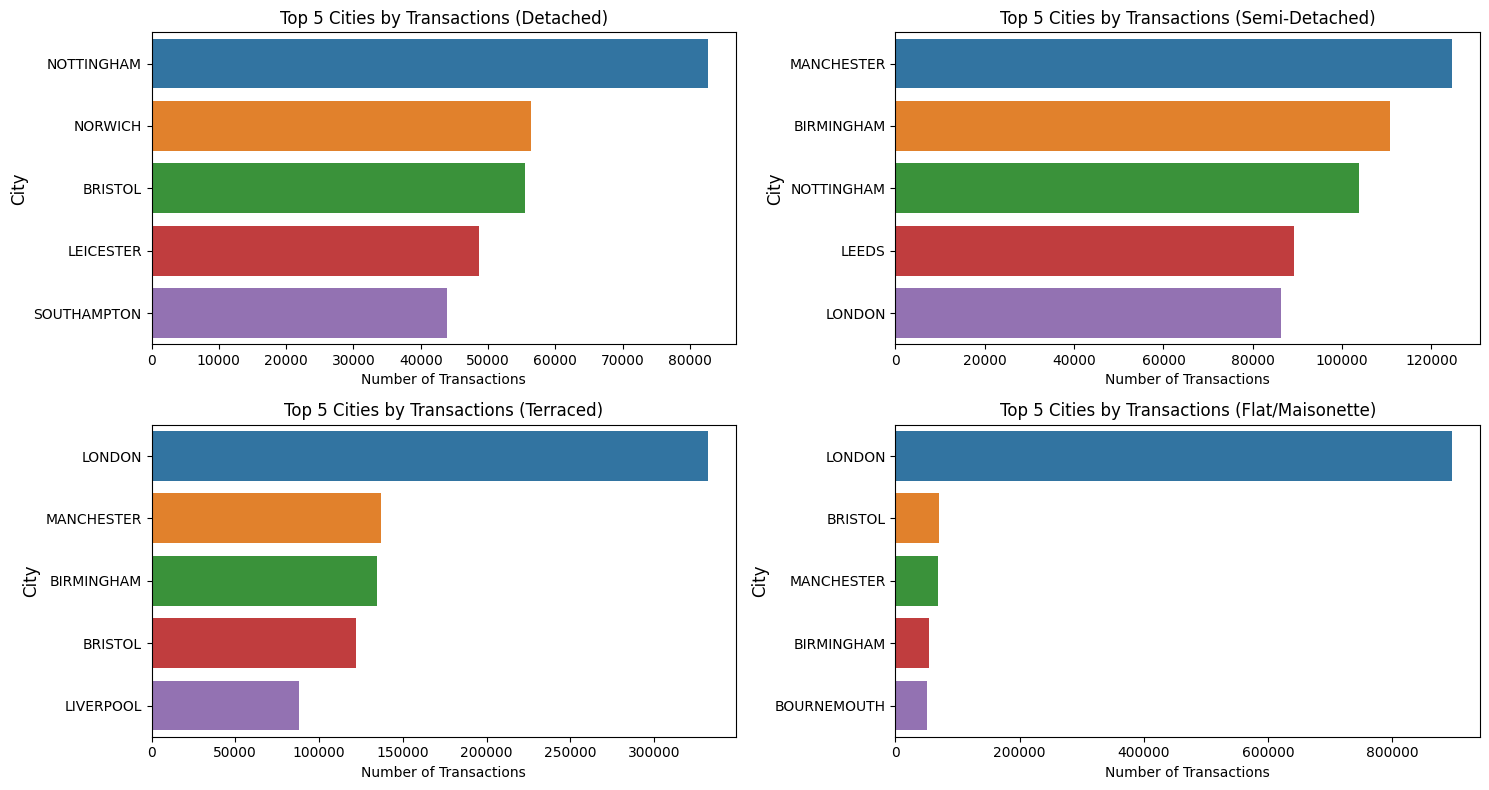

In [16]:
# Define the property types to loop over
property_types = ['D', 'S', 'T', 'F']
titles = {
    'T': 'Terraced',
    'S': 'Semi-Detached',
    'D': 'Detached',
    'F': 'Flat/Maisonette'
}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Generate the plots for each property type
for i, prop_type in enumerate(property_types):
    filtered_df = df[df['property_type'] == prop_type]
    
    # Count the number of transactions per city
    city_transactions = (
        filtered_df.groupby('city')
        .size()
        .sort_values(ascending=False)
        .head(5)
    )
    
    sns.barplot(
        x=city_transactions.values,
        y=city_transactions.index,
        ax=axes[i],
        hue=city_transactions.index,
        dodge=False,
        legend=False
    )
    
    # Set titles and labels
    axes[i].set_title(f'Top 5 Cities by Transactions ({titles[prop_type]})', fontsize=12)
    axes[i].set_xlabel('Number of Transactions', fontsize=10)
    axes[i].set_ylabel('City', fontsize=12)
    axes[i].ticklabel_format(useOffset=False, style='plain', axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

By inspecting the number of transactions by the property types showing us the Top 5 cites, we can decide on the city and property type that we want to forcast the price for. I ended up going for Terraced property type and London as a city.

In [ ]:
# Get only data for city London and property type Terraced (T)
london_terraced_df = df[
    ((df['city'] == 'LONDON') & (df['property_type'] == 'T'))
]

In [18]:
london_terraced_df.head()

,price,date_of_transfer,property_type,is_new,duration,city,district,county,ppdcategory_type
30,62000,1995-02-21,T,False,F,LONDON,BARNET,GREATER LONDON,A
37,77495,1995-01-05,T,False,F,LONDON,WALTHAM FOREST,GREATER LONDON,A
107,128500,1995-03-01,T,False,F,LONDON,WANDSWORTH,GREATER LONDON,A
168,90000,1995-09-22,T,False,F,LONDON,BARNET,GREATER LONDON,A
406,69500,1995-11-24,T,False,F,LONDON,MERTON,GREATER LONDON,A


In [ ]:
# Getting only necessery columns
london_terraced_df = london_terraced_df[['date_of_transfer', 'price']]

In [21]:
london_terraced_df.head()

,date_of_transfer,price
30,1995-02-21,62000
37,1995-01-05,77495
107,1995-03-01,128500
168,1995-09-22,90000
406,1995-11-24,69500


In [ ]:
# Changing the index to the 'date_of_transfer'
london_terraced_df.set_index('date_of_transfer', inplace=True)

In [23]:
london_terraced_df.head()

,price
date_of_transfer,
1995-02-21,62000
1995-01-05,77495
1995-03-01,128500
1995-09-22,90000
1995-11-24,69500


In [25]:
london_terraced_df.info()
london_terraced_df.to_parquet('data/london_terraced_forcasting.parquet', engine='pyarrow')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 332363 entries, 1995-02-21 to 2017-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   price   332363 non-null  int64
dtypes: int64(1)
memory usage: 5.1 MB
